In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
behavioral_file_path ="C:/Users/SAPTARSHI/Downloads/behavioral factors.xlsx" 
df_behavioral = pd.read_excel(behavioral_file_path)

In [5]:
# Define independent variables (X) and target variable (y)
X_behavioral = df_behavioral.drop(columns=["Have you ever crossed the street during a red light?"])
y_behavioral = df_behavioral["Have you ever crossed the street during a red light?"]

In [6]:
# Standardize continuous variables
scaler = StandardScaler()
X_behavioral_scaled = scaler.fit_transform(X_behavioral)

In [7]:
# Add constant for intercept
X_const_behavioral = sm.add_constant(X_behavioral_scaled)

In [8]:
# Split dataset into training and testing sets
X_train_beh, X_test_beh, y_train_beh, y_test_beh = train_test_split(
    X_const_behavioral, y_behavioral, test_size=0.2, random_state=42
)

In [9]:
# Train logistic regression model using statsmodels
logit_model_beh = sm.Logit(y_train_beh, X_train_beh)
result_beh = logit_model_beh.fit(disp=0)

In [10]:
# Get feature importance (coefficients) and calculate odds ratios
coefficients_beh = result_beh.params
odds_ratios_beh = np.exp(coefficients_beh)
p_values_beh = result_beh.pvalues
conf_intervals_beh = result_beh.conf_int()
conf_intervals_beh.columns = ['2.5% CI', '97.5% CI']

In [11]:
# Create a DataFrame to display feature importance, odds ratios, p-values, and confidence intervals
importance_df_beh = pd.DataFrame(
    {
        "Feature": X_behavioral.columns.insert(0, 'Intercept'),
        "Coefficient": coefficients_beh,
        "Odds_Ratio": odds_ratios_beh,
        "P-Value": p_values_beh,
        "2.5% CI": conf_intervals_beh['2.5% CI'],
        "97.5% CI": conf_intervals_beh['97.5% CI']
    }
).sort_values(by="Odds_Ratio", ascending=False)

In [12]:
# Print feature importance, odds ratios, p-values, and confidence intervals
print("Feature Importance, Odds Ratios, P-Values, and Confidence Intervals:")
print(importance_df_beh)


Feature Importance, Odds Ratios, P-Values, and Confidence Intervals:
                                                 Feature  Coefficient  \
x3           How often do you cross during a red light ?     1.011871   
x2            How many hours a day do you usually drive?     0.303585   
x1     How do you react when you see someone running ...    -2.090717   
const                                          Intercept    -2.258433   

       Odds_Ratio       P-Value   2.5% CI  97.5% CI  
x3       2.750743  2.156491e-16  0.770398  1.253344  
x2       1.354706  1.143807e-02  0.068310  0.538860  
x1       0.123598  6.258015e-17 -2.580861 -1.600573  
const    0.104514  7.867403e-25 -2.688628 -1.828237  


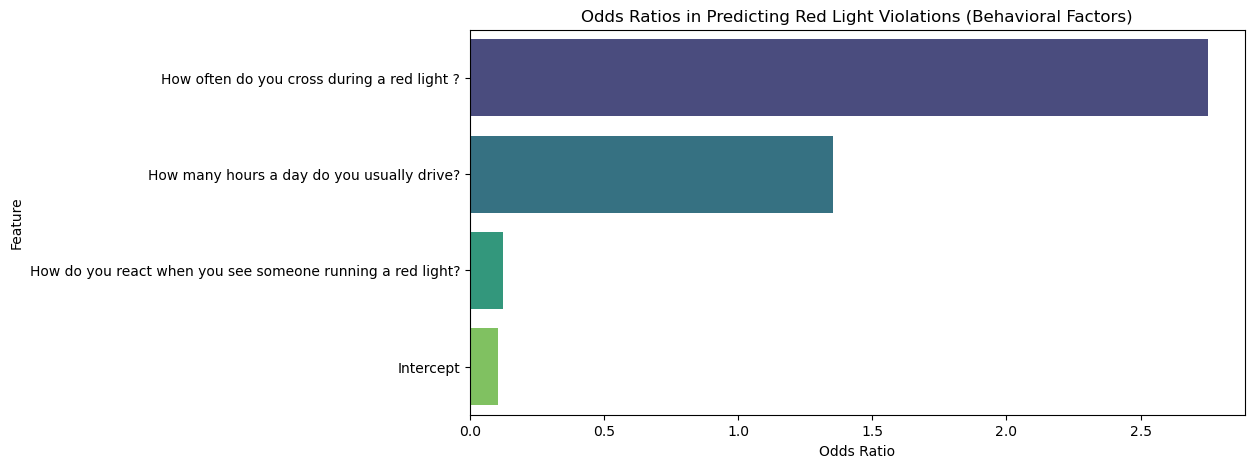

In [13]:
# Visualization of odds ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df_beh["Odds_Ratio"], y=importance_df_beh["Feature"], palette="viridis")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.title("Odds Ratios in Predicting Red Light Violations (Behavioral Factors)")
plt.show()


In [14]:
# Print feature importance and odds ratios
print("Feature Importance and Odds Ratios:")
print(importance_df_psych)


Feature Importance and Odds Ratios:
                                             Feature  Coefficient  Odds_Ratio
2        How often do you cross during a red light ?     1.619962    5.052899
1         How many hours a day do you usually drive?     0.186989    1.205614
0  How do you react when you see someone running ...    -2.032925    0.130952


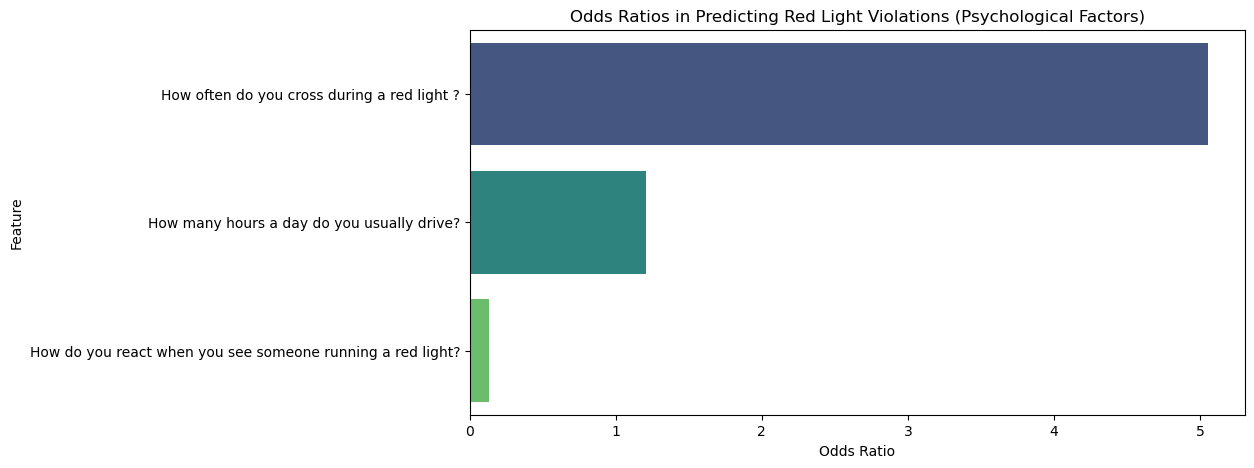

In [16]:
# Visualization of odds ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df_psych["Odds_Ratio"], y=importance_df_psych["Feature"], palette="viridis")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.title("Odds Ratios in Predicting Red Light Violations (Psychological Factors)")
plt.show()